In [33]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split

In [34]:
def step_func(z):
    return 1 if (z > 0) else 0

In [35]:
def perceptron(X, y, lr, epochs):
    m, n = X.shape
    
    weights = np.zeros((n+1,1))
    weights_batch = np.zeros((m, n+1, 1))
    
    for i in range(n+1):
        weights[i][0] = random.random()
    
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store number of misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, weights))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                #weights += lr*((y[idx] - y_hat)*x_i)
                weights_batch[idx] += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
              
        sum = 0
        for i in range(m):
            sum += weights_batch[i]
        weights = sum/m
        
        # Appending number of misclassified examples at every iteration
        n_miss_list.append(n_miss)
        anim_decsn.append(weights)
        
    return weights, n_miss_list

In [36]:
def plot_decision_boundary(X, theta):   
    x1 = [min(X_train[:,0]), max(X_train[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(5,5), dpi = 100)
    plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "gp", markersize=3)
    plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "rp", markersize=3)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.legend(['Class 1','Class 2'])
    plt.title('Perceptron Model')
    plt.plot(x1, x2, 'y-')

## 2D Data

In [37]:
#Create 2D data from normal distribution
A = np.random.normal(0, 1,size=[1000, 2])
B = np.random.normal(4, 1.5, size = [1000, 2])

In [38]:
Class1_x = []
Class1_y = []
Class2_x = []
Class2_y = []
for i in range (len(A)):
  Class1_x.append(A[i][0])
  Class1_y.append(A[i][1])
for i in range (len(B)):
  Class2_x.append(B[i][0])
  Class2_y.append(B[i][1])

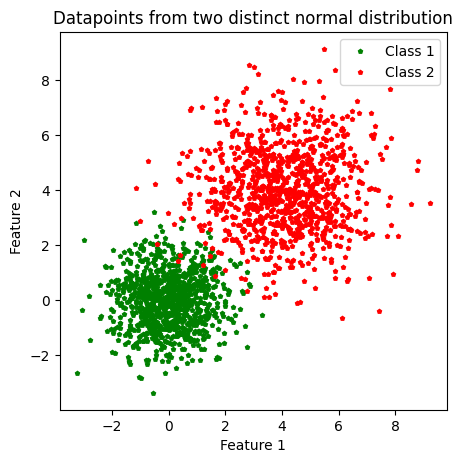

In [39]:
fig = plt.figure(figsize=(5,5), dpi = 100)
plt.plot(Class1_x, Class1_y, 'gp', markersize=3)
plt.plot(Class2_x, Class2_y, 'rp', markersize=3)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(['Class 1','Class 2'])
plt.title("Datapoints from two distinct normal distribution")
plt.show()

In [40]:
#Creating target
Label_Class1 = np.zeros(len(A))
Label_Class2 = np.ones(len(B))

X = np.concatenate([A, B], axis = 0)
Y = np.concatenate([Label_Class1, Label_Class2], axis = 0)
print(X.shape)
print(Y.shape)

(2000, 2)
(2000,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 36)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1400, 2)
(1400,)
(600, 2)
(600,)


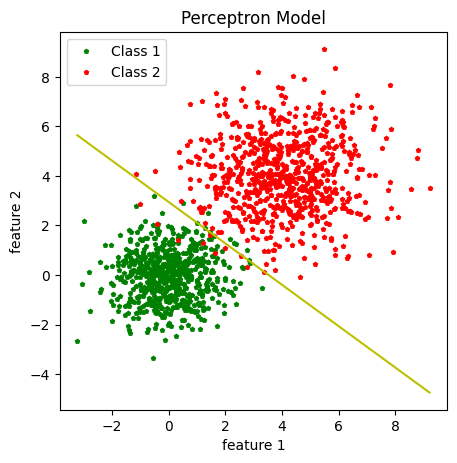

In [43]:
anim_decsn = []
theta, miss_l = perceptron(X_train, y_train, 0.5, 150)
plot_decision_boundary(X_train, theta)

In [44]:
def predict(weights, test):
  
  activation = weights[0] + weights[1]*test[0] + weights[2]*test[1]
  return 1.0 if activation > 0.0 else 0.0

In [45]:
y_pred = []
for i in range(len(X_test)):
  y_pred.append(predict(theta, X_test[i]))

Text(0, 0.5, 'Error(Number of misclassified points)')

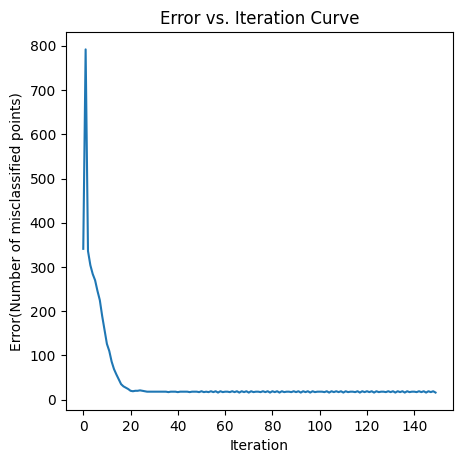

In [46]:
fig = plt.figure(figsize=(5,5), dpi = 100)
plt.plot(miss_l)
plt.title('Error vs. Iteration Curve')
plt.xlabel('Iteration')
plt.ylabel('Error(Number of misclassified points)')

In [47]:
#Creating video
from matplotlib.animation import FuncAnimation 
from IPython import display

# initializing a figure in which the graph will be plotted
fig = plt.figure() 
 
# marking the x-axis and y-axis
axis = plt.axes(xlim =(min(X[:,0]) - 2, max(X[:,0]) + 2), 
                ylim =(min(X[:,1]) - 2, max(X[:,1]) + 2))
  
# initializing a line variable
line, = axis.plot([], [], lw = 3) 
   
# data which the line will contain (x, y)
def init(): 
    line.set_data([], [])
    return line,

def animate(i):  
    plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'gp', markersize = 1)
    plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'rp', markersize = 1)
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -anim_decsn[i][1]/anim_decsn[i][2]
    c = -anim_decsn[i][0]/anim_decsn[i][2]
    x2 = m*x1 + c
    
    line.set_data(x1, x2)
    return line,

anim = FuncAnimation(fig, animate, frames = 110, repeat = True, blit = True)  # frames = epochs

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

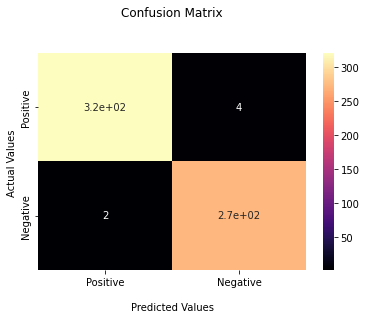

In [48]:
#Confusion matrix for 2D data
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap = plt.cm.magma)

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Positive', 'Negative'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [49]:
#Making f1 score, recall, precision
from sklearn import metrics
print('Performance Report (Accuracy score on test set) :', format(metrics.accuracy_score(y_test, y_pred), '.2f'),'\n\n')
target=[str(i) for i in range(2)]
print('Classification Report'.center(65,' '),'\n', metrics.classification_report(y_test, y_pred,target_names=target))

Performance Report (Accuracy score on test set) : 0.99 


                      Classification Report                       
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       325
           1       0.99      0.99      0.99       275

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



## IRIS Data

In [50]:
#import iris dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [51]:
#Slicing the dataset upto 100 rows
df = df[:100]
np.unique(df[4])

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [52]:
#One hot encoding
for i in range(len(df)):
  if df[4][i]== 'Iris-setosa':
    df[4][i] = 1
  else:
    df[4][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [54]:
df.tail()

,0,1,2,3,4
95,5.7,3.0,4.2,1.2,0
96,5.7,2.9,4.2,1.3,0
97,6.2,2.9,4.3,1.3,0
98,5.1,2.5,3.0,1.1,0
99,5.7,2.8,4.1,1.3,0


In [55]:
y = df[4].to_numpy()

In [56]:
X = (df.drop([4], axis = 1)).to_numpy()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)
y_train = np.array(y_train, dtype = int)
y_test = np.array(y_test, dtype = int)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 4)
(30, 4)
(70,)
(30,)


In [59]:
anim_decsn = []
theta, miss_l = perceptron(X_train, y_train, 0.5, 150)

In [60]:
def predict(weights, test):
  activation = weights[0] + weights[1]*test[0] + weights[2]*test[1] + weights[3]*test[2] + weights[4]*test[3]
  return 1.0 if activation > 0.0 else 0.0
y_pred = []
for i in range(len(X_test)):
  y_pred.append(predict(theta, X_test[i]))

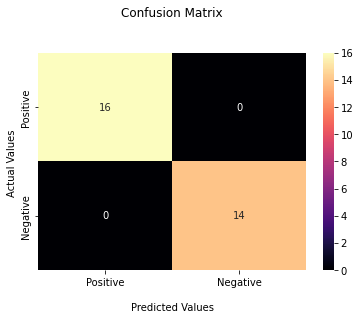

In [61]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap = plt.cm.magma)

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Positive', 'Negative'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [62]:
from sklearn import metrics
print('Performance Report (Accuracy score on test set) :', format(metrics.accuracy_score(y_test, y_pred), '.2f'),'\n\n')
target=[str(i) for i in range(2)]
print('Classification Report'.center(65,' '),'\n', metrics.classification_report(y_test, y_pred,target_names=target))

Performance Report (Accuracy score on test set) : 1.00 


                      Classification Report                       
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

